In [1]:
#importing the few important library
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt 
import seaborn as sns

In [2]:
#importing the dataset
data=pd.read_csv("PacificWest-Customer-Campaign-data.csv",sep=",",header=0)

In [3]:
type(data)

pandas.core.frame.DataFrame

In [9]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 9134 entries, 0 to 9133
Data columns (total 24 columns):
Customer ID                      9134 non-null object
State                            9134 non-null object
Location Code                    9134 non-null object
Gender                           9134 non-null object
Marital Status                   9134 non-null object
Education                        9134 non-null object
Employment Status                9134 non-null object
Income (USD)                     9134 non-null float64
Effective To Date                9134 non-null object
Customer Lifetime Value (USD)    9134 non-null float64
Coverage                         9134 non-null object
Monthly Premium Auto (USD)       9134 non-null int64
Number of Policies               9134 non-null int64
Policy Type                      9134 non-null object
Policy                           9134 non-null object
Months Since Policy Inception    9134 non-null int64
Months Since Last Claim       

In [4]:
len(data)

9134

In [5]:
data.shape

(9134, 24)

In [6]:
data.columns

Index(['Customer ID', 'State', 'Location Code', 'Gender', 'Marital Status',
       'Education', 'Employment Status', 'Income (USD)', 'Effective To Date',
       'Customer Lifetime Value (USD)', 'Coverage',
       'Monthly Premium Auto (USD)', 'Number of Policies', 'Policy Type',
       'Policy', 'Months Since Policy Inception', 'Months Since Last Claim',
       'Sales Channel', 'Renew Offer Type', 'Number of Open Complaints',
       'Total Claim Amount (USD)', 'Vehicle Class', 'Vehicle Size',
       'Response'],
      dtype='object')

In [18]:
data.head()
#data.tail()

,Customer ID,State,Location Code,Gender,Marital Status,Education,Employment Status,Income (USD),Effective To Date,Customer Lifetime Value (USD),...,Policy,Months Since Policy Inception,Months Since Last Claim,Sales Channel,Renew Offer Type,Number of Open Complaints,Total Claim Amount (USD),Vehicle Class,Vehicle Size,Response
0,BU79786,Washington,Suburban,F,Married,Bachelor,Employed,"56,274.00",24-Feb-11,"2,763.52",...,Corporate L3,5,32,Agent,Offer1,0,384.81,Two-Door Car,Medsize,No
1,QZ44356,Arizona,Suburban,F,Single,Bachelor,Unemployed,0,31-Jan-11,"6,979.54",...,Personal L3,42,13,Agent,Offer3,0,"1,131.46",Four-Door Car,Medsize,No
2,AI49188,Nevada,Suburban,F,Married,Bachelor,Employed,"48,767.00",19-Feb-11,"12,887.43",...,Personal L3,38,18,Agent,Offer1,0,566.47,Two-Door Car,Medsize,No
3,WW63253,California,Suburban,M,Married,Bachelor,Unemployed,0,20-Jan-11,"7,645.86",...,Corporate L2,65,18,Call Center,Offer1,0,529.88,SUV,Medsize,No
4,HB64268,Washington,Rural,M,Single,Bachelor,Employed,"43,836.00",03-Feb-11,"2,813.69",...,Personal L1,44,12,Agent,Offer1,0,138.13,Four-Door Car,Medsize,No


In [183]:
#data.info()

In [182]:
#converting Object variables to float variables

#list(map(lambda s: float (s.replace (',', '')), data['Customer Lifetime Value (USD)']))
#list(map(lambda s: float (s.replace (',', '')), data['Income (USD)']))
#list(map(lambda s: float (s.replace (',', '')), data['Total Claim Amount (USD)']))

In [7]:
data['Customer Lifetime Value (USD)'] = data['Customer Lifetime Value (USD)'].str.replace(',', '').astype(float)
data['Income (USD)'] = data['Income (USD)'].str.replace(',', '').astype(float)
data['Total Claim Amount (USD)'] = data['Total Claim Amount (USD)'].str.replace(',', '').astype(float)

In [184]:
#data.info()

In [8]:
print('Number of customers: ', len(data['Customer ID'].unique()))

Number of customers:  9134


In [20]:
#automatically Discription of numeric variables
data.describe()

,Monthly Premium Auto (USD),Number of Policies,Months Since Policy Inception,Months Since Last Claim,Number of Open Complaints
count,9134.000000,9134.000000,9134.000000,9134.000000,9134.000000
mean,93.219291,2.966170,48.064594,15.097000,0.384388
std,34.407967,2.390182,27.905991,10.073257,0.910384
min,61.000000,1.000000,0.000000,0.000000,0.000000
25%,68.000000,1.000000,24.000000,6.000000,0.000000
50%,83.000000,2.000000,48.000000,14.000000,0.000000
75%,109.000000,4.000000,71.000000,23.000000,0.000000
max,298.000000,9.000000,99.000000,35.000000,5.000000


In [19]:
#distribution of categorical variables
data['State'].value_counts()

California    3150
Oregon        2601
Arizona       1703
Nevada         882
Washington     798
Name: State, dtype: int64

In [87]:
# make list of numerical variables
num_vars = [var for var in data.columns if data[var].dtypes != 'O']
print('Number of numerical variables: ', len(num_vars))

# visualise the numerical variables
data[num_vars].head()

Number of numerical variables:  8


,Income (USD),Customer Lifetime Value (USD),Monthly Premium Auto (USD),Number of Policies,Months Since Policy Inception,Months Since Last Claim,Number of Open Complaints,Total Claim Amount (USD)
0,56274.0,2763.52,69,1,5,32,0,384.81
1,0.0,6979.54,94,8,42,13,0,1131.46
2,48767.0,12887.43,108,2,38,18,0,566.47
3,0.0,7645.86,106,7,65,18,0,529.88
4,43836.0,2813.69,73,1,44,12,0,138.13


In [89]:
#  let's male a list of discrete variables
discrete_vars = [var for var in num_vars if len(
    data[var].unique()) < 20]

print('Number of discrete variables: ', len(discrete_vars))

Number of discrete variables:  2


In [90]:
discrete_vars

['Number of Policies', 'Number of Open Complaints']

In [91]:
# make list of continuous variables
cont_vars = [
    var for var in num_vars if var not in discrete_vars]
print('Number of continuous variables: ', len(cont_vars))

Number of continuous variables:  6


In [92]:
cont_vars

['Income (USD)',
 'Customer Lifetime Value (USD)',
 'Monthly Premium Auto (USD)',
 'Months Since Policy Inception',
 'Months Since Last Claim',
 'Total Claim Amount (USD)']

In [129]:
data[cont_vars].describe()

,Income (USD),Customer Lifetime Value (USD),Monthly Premium Auto (USD),Months Since Policy Inception,Months Since Last Claim,Total Claim Amount (USD)
count,9134.000000,9134.000000,9134.000000,9134.000000,9134.000000,9134.000000
mean,37657.380009,8004.940475,93.219291,48.064594,15.097000,434.088834
std,30379.904734,6870.967602,34.407967,27.905991,10.073257,290.500043
min,0.000000,1898.010000,61.000000,0.000000,0.000000,0.100000
25%,0.000000,3994.250000,68.000000,24.000000,6.000000,272.260000
50%,33889.500000,5780.180000,83.000000,48.000000,14.000000,383.945000
75%,62320.000000,8962.170000,109.000000,71.000000,23.000000,547.515000
max,99981.000000,83325.380000,298.000000,99.000000,35.000000,2893.240000


In [ ]:
#Function	Description
1	count()	Number of non-null observations
2	sum()	Sum of values
3	mean()	Mean of Values
4	median()	Median of Values
5	mode()	Mode of values
6	std()	Standard Deviation of the Values
7	min()	Minimum Value
8	max()	Maximum Value
9	abs()	Absolute Value
10	prod()	Product of Values
11	cumsum()	Cumulative Sum
12	cumprod()	Cumulative Product

In [138]:
#quantile distribution
data[cont_vars].quantile([.1, .25, .5, .75], axis = 0)

,Income (USD),Customer Lifetime Value (USD),Monthly Premium Auto (USD),Months Since Policy Inception,Months Since Last Claim,Total Claim Amount (USD)
0.10,0.0,2661.757,64.0,10.0,2.0,104.085
0.25,0.0,3994.250,68.0,24.0,6.0,272.260
0.50,33889.5,5780.180,83.0,48.0,14.0,383.945
0.75,62320.0,8962.170,109.0,71.0,23.0,547.515


In [139]:
data[cont_vars].skew()

#Highly skewed distribution: If the skewness value is less than −1 or greater than +1.
#Moderately skewed distribution: If the skewness value is between −1 and −½ or between +½ and +1.
#Approximately symmetric distribution: If the skewness value is between −½ and +½.

Income (USD)                     0.286887
Customer Lifetime Value (USD)    3.032280
Monthly Premium Auto (USD)       2.123546
Months Since Policy Inception    0.040165
Months Since Last Claim          0.278586
Total Claim Amount (USD)         1.714965
dtype: float64

In [122]:
# capture categorical variables in a list
cat_vars = [var for var in data.columns if data[var].dtypes == 'O' and var not in ['Customer ID','Effective To Date']]

print('Number of categorical variables: ', len(cat_vars))
cat_vars

Number of categorical variables:  14


['State',
 'Location Code',
 'Gender',
 'Marital Status',
 'Education',
 'Employment Status',
 'Coverage',
 'Policy Type',
 'Policy',
 'Sales Channel',
 'Response',
 'Renew Offer Type',
 'Vehicle Class',
 'Vehicle Size']

In [123]:
#count of unique categories
data[cat_vars].nunique()

State                5
Location Code        3
Gender               2
Marital Status       3
Education            5
Employment Status    5
Coverage             3
Policy Type          3
Policy               9
Sales Channel        4
Response             2
Renew Offer Type     4
Vehicle Class        6
Vehicle Size         3
dtype: int64

In [128]:
#count of each categories for categorical variables
data['State'].value_counts(sort=True,ascending=False)

California    3150
Oregon        2601
Arizona       1703
Nevada         882
Washington     798
Name: State, dtype: int64

In [126]:
#count of unique categories for discrete variables
data[discrete_vars].nunique()

Number of Policies           9
Number of Open Complaints    6
dtype: int64

In [ ]:
##Visualizations of (continuous variables) and (Categorical +Discrete Variables)
#list of variables
cont_vars
discrete_vars
cat_vars

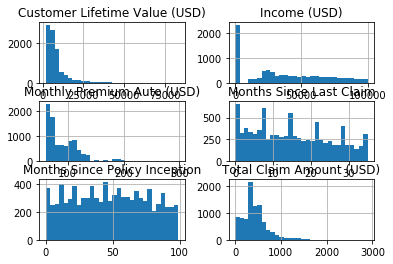

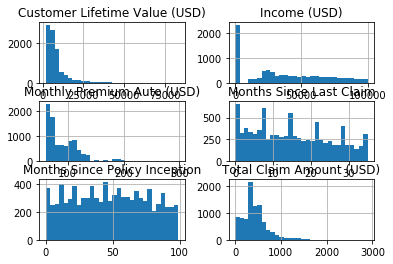

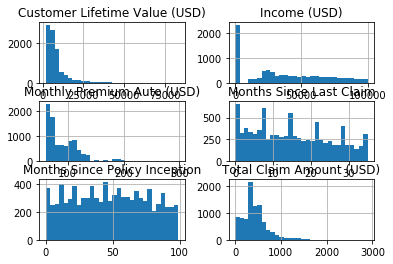

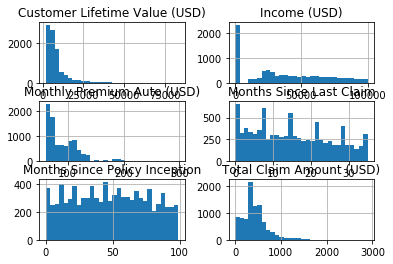

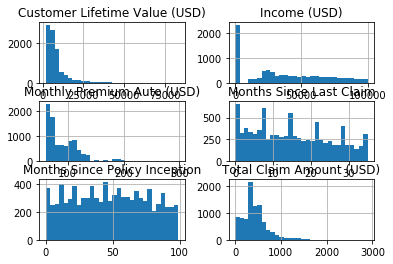

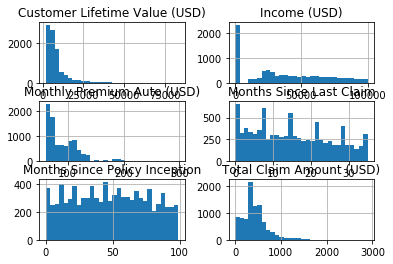

In [145]:
# Let's go ahead and analyse the distributions of these variables
def analyse_continuous(df, var):
    df = df.copy()
    df[var].hist(bins=30)
    #plt.ylabel('Number of houses')
    #plt.xlabel(var)
    #plt.title(var)
    plt.show()

for var in cont_vars:
    analyse_continuous(data, cont_vars)

In [157]:
cont_vars

['Income (USD)',
 'Customer Lifetime Value (USD)',
 'Monthly Premium Auto (USD)',
 'Months Since Policy Inception',
 'Months Since Last Claim',
 'Total Claim Amount (USD)']

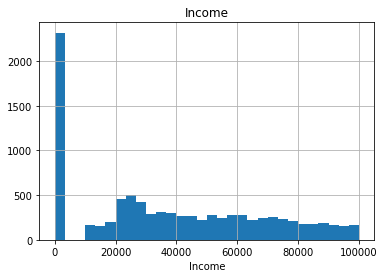

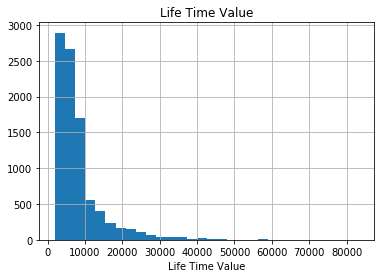

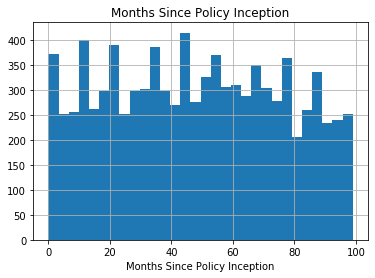

In [156]:
data['Income (USD)'].hist(bins=30)
#plt.ylabel('Income')
plt.xlabel('Income')
plt.title('Income')
plt.show()

data['Customer Lifetime Value (USD)'].hist(bins=30)
#plt.ylabel('Income')
plt.xlabel('Life Time Value')
plt.title('Life Time Value')
plt.show()

data['Months Since Policy Inception'].hist(bins=30)
#plt.ylabel('Income')
plt.xlabel('Months Since Policy Inception')
plt.title('Months Since Policy Inception')
plt.show()



In [158]:
cat_vars

['State',
 'Location Code',
 'Gender',
 'Marital Status',
 'Education',
 'Employment Status',
 'Coverage',
 'Policy Type',
 'Policy',
 'Sales Channel',
 'Response',
 'Renew Offer Type',
 'Vehicle Class',
 'Vehicle Size']

Text(0, 0.5, 'Frequency')

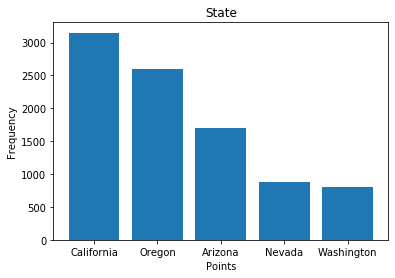

In [167]:
fig, ax = plt.subplots()
state_cat = data['State'].value_counts() 
# get x and y data 
points = state_cat.index 
frequency = state_cat.values 
# create bar chart 
ax.bar(points, frequency) 
# set title and labels 
ax.set_title('State') 
ax.set_xlabel('Points') 
ax.set_ylabel('Frequency')

Text(0, 0.5, 'Frequency')

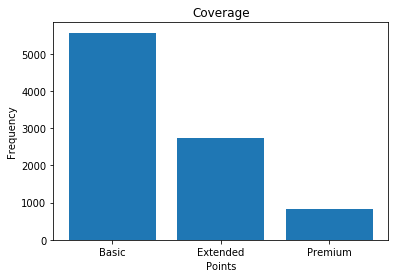

In [169]:
fig, ax = plt.subplots()
coverage_cat = data['Coverage'].value_counts() 
# get x and y data 
points = coverage_cat.index 
frequency = coverage_cat.values 
# create bar chart 
ax.bar(points, frequency) 
# set title and labels 
ax.set_title('Coverage') 
ax.set_xlabel('Points') 
ax.set_ylabel('Frequency')

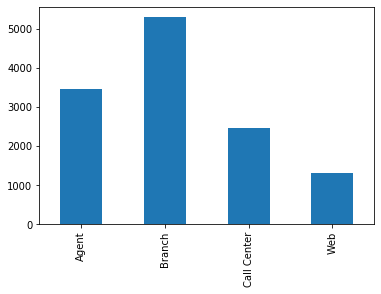

In [172]:
data['Marital Status'].value_counts().sort_index().plot.bar()

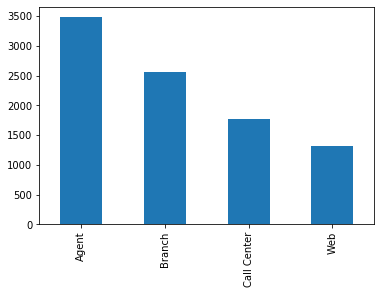

In [173]:
data['Sales Channel'].value_counts().sort_index().plot.bar()

In [10]:
import pandas_profiling
from pandas_profiling import ProfileReport

In [23]:
prof = ProfileReport(data)
prof.to_file(output_file='output.html')